In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers, models, optimizers

## Cargando Los Datos 

In [3]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

## Normalizando los Datos 

In [4]:
mean= train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data =train_data/std


test_data = test_data - mean
test_data = test_data/std


### Creando el modelo 

In [5]:
Nr=train_data.shape[1] ## Numero de Variables que se van a emplear para realizar la regresión 

In [6]:
def build_model_regression (lr_var,input_data_size):
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(input_data_size,)))
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer= optimizers.RMSprop(lr=lr_var),loss='mse',metrics=['mae'])
    return model

## Construyendo la Validación Cruzada

In [7]:
k=4

num_val_samples = len(train_data) //k

num_epoch = 100

all_mae =[]
all_val_mae =[]

for  i in range(k):
    print(f'Realizando el Fold: {i}')
    val_data = train_data[i*num_val_samples : (i+1) * num_val_samples ]
    val_targets = train_labels[i*num_val_samples : (i+1) * num_val_samples ]
    partial_train_data = np.concatenate([train_data[: i * num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_labels[: i * num_val_samples],train_labels[(i+1)*num_val_samples:]],axis=0)
    model = build_model_regression(0.001,Nr)
    history=model.fit(partial_train_data,partial_train_targets,epochs=num_epoch,batch_size=16,validation_data=(val_data,val_targets),verbose=0)
    all_mae.append(history.history['mean_absolute_error'])
    all_val_mae.append(history.history['val_mean_absolute_error'])



Realizando el Fold: 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Realizando el Fold: 1
Realizando el Fold: 2
Realizando el Fold: 3


In [8]:
all_mae_df=pd.DataFrame(all_mae)
all_mae_avg = all_mae_df.mean(axis=0)
all_val_mae_df=pd.DataFrame(all_val_mae)
all_val_mae_avg = all_val_mae_df.mean(axis=0)


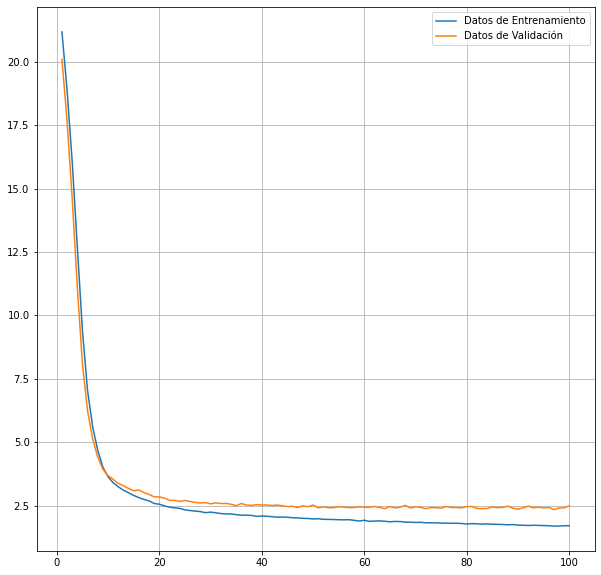

In [9]:
plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg)+1,),all_mae_avg,label='Datos de Entrenamiento')
plt.plot(range(1,len(all_val_mae_avg)+1,),all_val_mae_avg,label='Datos de Validación')
plt.legend()
plt.grid()
plt.show()


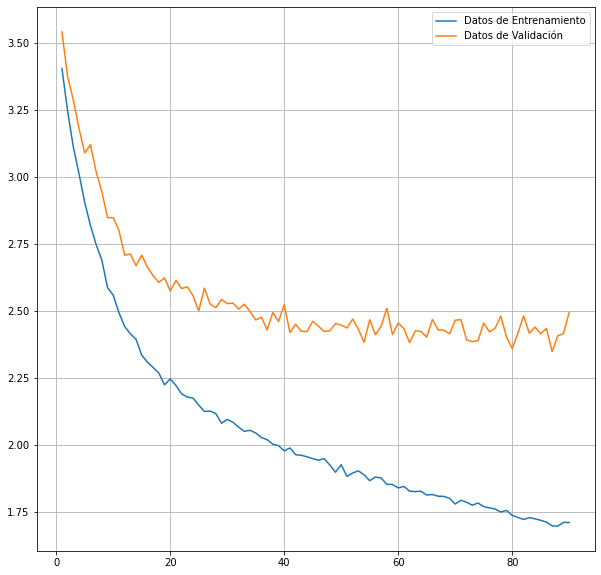

In [10]:
plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[10:])+1,),all_mae_avg[10:],label='Datos de Entrenamiento')
plt.plot(range(1,len(all_val_mae_avg[10:])+1,),all_val_mae_avg[10:],label='Datos de Validación')
plt.legend()
plt.grid()
plt.show()

In [11]:
model.evaluate(test_data,test_labels)

102/102 [==============================] - 0s 69us/sample - loss: 20.7952 - mean_absolute_error: 2.7606


[20.795207902496937, 2.760598]